(Machine Learning: Logistic Regresion)

In [4]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
url ="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv"
filename = "Data\Sigmoid.txt"
urllib.request.urlretrieve(url, filename)

('Data\\Sigmoid.txt', <http.client.HTTPMessage at 0x1a7bc571b50>)

In [6]:
Data = pd.read_csv(filename)
X = np.float64(Data.x)
Y = np.float64(Data.y)

In [7]:
def Modelo(theta,x):
    den=theta[1] + np.exp(-1*theta[2]*x)
    return theta[0]/den

In [8]:
def Cost_Function(X,Y,Modelo,theta):
    distancia=(Y-Modelo(theta,X))
    sum_=np.sum(distancia**2)
    return sum_

In [9]:
def GetGradient(G,r,h=1e-6):
    Grad = np.zeros(3)
    Grad[0] = (G(X,Y,Modelo,[r[0] + h,r[1],r[2]]) - G(X,Y,Modelo,[r[0] - h,r[1],r[2]]))/(2*h)
    Grad[1] = (G(X,Y,Modelo,[r[0],r[1]+h,r[2]]) - G(X,Y,Modelo,[r[0] ,r[1]-h,r[2]]))/(2*h)
    Grad[2] = (G(X,Y,Modelo,[r[0] ,r[1],r[2]+h]) - G(X,Y,Modelo,[r[0] ,r[1],r[2]-h]))/(2*h)
        
    return Grad

In [10]:
Gradiente=GetGradient(Cost_Function,[1,1,1])

In [11]:
def GetSolve(G,r,lr=5e-4,epochs=int(1e4),error=1e-4):
    
    d = 1
    it = 0
    
    while  d > error and it < epochs:
        grad= GetGradient(G,r)
        r -= lr*grad
        it += 1   
        d=np.linalg.norm(lr*grad)
        
    return r

In [12]:
Parametros=GetSolve(Cost_Function,[1,1,1])
print(Parametros)

[3.87415893 0.85687642 2.85839615]


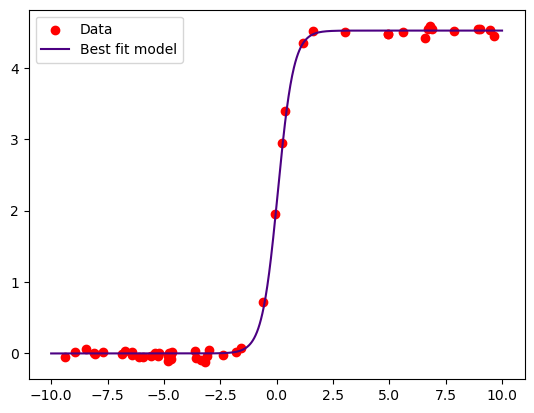

In [13]:
x_=np.linspace(-10, 10,1000)
plt.scatter(X,Y,label="Data",c="r")
plt.plot(x_,Modelo(Parametros,x_),label="Best fit model",c="indigo")
plt.legend()